<a href="https://colab.research.google.com/github/wrn6494/-8-Week-SQL-Challenge/blob/main/Case_Study_3_Foodie_Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8 Week SQL Challenge : Case Study #3 - Foodie-Fi**

Full case study available [here.](https://8weeksqlchallenge.com/case-study-3/)

**Entity Relationship Diagram**

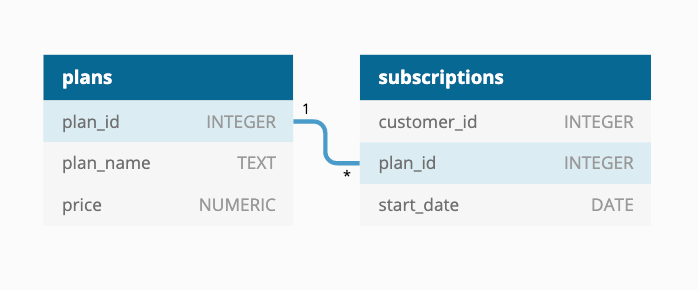

# Case Study Questions

****

**A. Customer Journey**

Based off the 8 sample customers provided in the sample from the subscriptions table, write a brief description about each customer’s onboarding journey.

Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

**B. Data Analysis Questions**

1.  How many customers has Foodie-Fi ever had?
2.  What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value
3. What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name
4. What is the customer count and percentage of customers who have churned rounded to 1 decimal place?
5. How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?
6. What is the number and percentage of customer plans after their initial free trial?
7. What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?
8. How many customers have upgraded to an annual plan in 2020?
9. How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?
10. Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)
11. How many customers downgraded from a pro monthly to a basic monthly plan in 2020?

**C. Challenge Payment Question**

The Foodie-Fi team wants you to create a new payments table for the year 2020 that includes amounts paid by each customer in the subscriptions table with the following requirements:

*   monthly payments always occur on the same day of month as the original start_date of any monthly paid plan
*   upgrades from basic to monthly or pro plans are reduced by the current paid amount in that month and start immediately
*  upgrades from pro monthly to pro annual are paid at the end of the current billing period and also starts at the end of the month period
*  once a customer churns they will no longer make payments

**D. Outside The Box Questions**

1. How would you calculate the rate of growth for Foodie-Fi?
2. What key metrics would you recommend Foodie-Fi management to track over time to assess performance of their overall business?
3. What are some key customer journeys or experiences that you would analyse further to improve customer retention?
4. If the Foodie-Fi team were to create an exit survey shown to customers who wish to cancel their subscription, what questions would you include in the survey?
5. What business levers could the Foodie-Fi team use to reduce the customer churn rate? How would you validate the effectiveness of your ideas?

# A.Customer Journey

Sample Customers: 1,2,11,13,15,16,18,19

    SELECT customer_id, plan_name
    FROM foodie_fi.plans p
    JOIN foodie_fi.subscriptions s
    USING (plan_id)
    WHERE customer_id IN (1,2,11,13,15,16,18,19)
    ORDER BY customer_id,plan_id;

| customer_id | plan_name     |
| ----------- | ------------- |
| 1           | trial         |
| 1           | basic monthly |
| 2           | trial         |
| 2           | pro annual    |
| 11          | trial         |
| 11          | churn         |
| 13          | trial         |
| 13          | basic monthly |
| 13          | pro monthly   |
| 15          | trial         |
| 15          | pro monthly   |
| 15          | churn         |
| 16          | trial         |
| 16          | basic monthly |
| 16          | pro annual    |
| 18          | trial         |
| 18          | pro monthly   |
| 19          | trial         |
| 19          | pro monthly   |
| 19          | pro annual    |


# B. Data Analysis Questions

**B.1  How many customers has Foodie-Fi ever had?**

    SELECT COUNT(DISTINCT customer_id)
    FROM foodie_fi.subscriptions;

| count |
| ----- |
| 1000  |


**B.2. What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value**

    SELECT TO_CHAR(start_date, 'Month')  AS month, COUNT(customer_id) AS Customers_with_Trial
    FROM foodie_fi.subscriptions s
    WHERE plan_id=0
    GROUP BY EXTRACT(MONTH FROM start_date), TO_CHAR(start_date, 'Month');

| month     | customers_with_trial |
| --------- | -------------------- |
| January   | 88                   |
| February  | 68                   |
| March     | 94                   |
| April     | 81                   |
| May       | 88                   |
| June      | 79                   |
| July      | 89                   |
| August    | 88                   |
| September | 87                   |
| October   | 79                   |
| November  | 75                   |
| December  | 84                   |

**B.3 What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name**

    SELECT plan_name, COUNT(start_date) AS no_of_events
    FROM foodie_fi.subscriptions s
    JOIN  foodie_fi.plans p
    USING (plan_id)
    WHERE start_date>'2020-12-31'
    GROUP BY plan_name;

| plan_name     | no_of_events |
| ------------- | ------------ |
| pro annual    | 63           |
| churn         | 71           |
| pro monthly   | 60           |
| basic monthly | 8            |

**B.4 What is the customer count and percentage of customers who have churned rounded to 1 decimal place?**

    SELECT COUNT(DISTINCT customer_id)
    FROM foodie_fi.subscriptions
    WHERE plan_id = 4;

| count |
| ----- |
| 307   |


    WITH A AS
    (
    SELECT DISTINCT customer_id as churned
    FROM foodie_fi.subscriptions
    WHERE plan_id = 4
    )

    SELECT(COUNT(DISTINCT churned)/ COUNT(DISTINCT customer_id)::float)*100 AS churn_percentage
    FROM foodie_fi.subscriptions, A;

| churn_percentage |
| ---------------- |
| 30.7             |

**B.5 How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?**

    WITH A AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=0
    ),
    B AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=4
    )

    SELECT COUNT(B.customer_id),ROUND(((COUNT(B.customer_id)::float/1000)*100)::NUMERIC,0) AS churned_straight_perc
    FROM A
    JOIN B
    USING (customer_id)
    WHERE B.start_date-A.start_date<=7;

| count | churned_straight_perc |
| ----- | --------------------- |
| 92    | 9                     |

**B.6 What is the number and percentage of customer plans after their initial free trial?**


    WITH A AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=0
    ),
    B AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id IN (1,2,3)
    )

    SELECT COUNT(B.customer_id),ROUND(((COUNT(B.customer_id)::float/1000)*100)::NUMERIC,0) AS plan_perc
    FROM A
    JOIN B
    USING (customer_id)
    WHERE B.start_date-A.start_date<=7;

| count | plan_perc |
| ----- | --------------------- |
| 908   | 91                    |

**B.7 What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?**

    WITH A AS
    (
    SELECT DISTINCT customer_id AS customers,
     	MAX(plan_id) as plan_id
    FROM foodie_fi.subscriptions
    WHERE start_date<= '2020-12-31'
    GROUP BY customer_id
    ),

    B AS
    (
    SELECT COUNT (DISTINCT customer_id) AS total
    FROM foodie_fi.subscriptions
    WHERE start_date<= '2020-12-31'
    )


    SELECT plan_name,COUNT(customers),
    	ROUND(((COUNT(customers)::float/total)*100)::NUMERIC,1) as percentage
    FROM B, A
    JOIN foodie_fi.plans
    USING (plan_id)
    GROUP BY plan_name, plan_id,total
    ORDER BY plan_id;

| plan_name     | count | percentage |
| ------------- | ----- | ---------- |
| trial         | 19    | 1.9        |
| basic monthly | 224   | 22.4       |
| pro monthly   | 326   | 32.6       |
| pro annual    | 195   | 19.5       |
| churn         | 236   | 23.6       |

**B.8 How many customers have upgraded to an annual plan in 2020?**

195

**B.9 How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?**

    WITH A AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=0
    ),
    B AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=3
    )

    SELECT AVG(B.start_date-A.start_date)
    FROM A
    JOIN B
    USING (customer_id);

| avg                  |
| -------------------- |
| 104.6201550387596899 |


**B.10 Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)**

    WITH A AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=0
    ),
    B AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=3
    ),
    C AS
    (
    SELECT (B.start_date-A.start_date) AS diff ,
      FLOOR((B.start_date-A.start_date)::NUMERIC/30) AS bins
    FROM A
    JOIN B
    USING (customer_id)
    )

    SELECT CONCAT ((bins*30)+1,'-',(bins+1)*30) AS days, COUNT(diff)
    FROM C
    GROUP BY days,bins
    ORDER BY bins;

| days    | count |
| ------- | ----- |
| 1-30    | 48    |
| 31-60   | 25    |
| 61-90   | 33    |
| 91-120  | 35    |
| 121-150 | 43    |
| 151-180 | 35    |
| 181-210 | 27    |
| 211-240 | 4     |
| 241-270 | 5     |
| 271-300 | 1     |
| 301-330 | 1     |
| 331-360 | 1     |

**B.11 How many customers downgraded from a pro monthly to a basic monthly plan in 2020?**

    WITH A AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=1
    ),
    B AS
    (
    SELECT customer_id, start_date
    FROM foodie_fi.subscriptions
    WHERE plan_id=2
    )

    SELECT COUNT(A.customer_id)
    FROM A
    JOIN B
    USING (customer_id)
    WHERE A.start_date>B.start_date
    AND A.start_date<='2020-12-31';

| count |
| ----- |
| 0     |

# C. Challenge Payment Question

    SELECT 
      customer_id,
      plan_id,
      plan_name,
      start_date,
      price
    INTO foodie_fi.payments
    FROM foodie_fi.subscriptions
    JOIN foodie_fi.plans
    USING (plan_id)
    ORDER BY customer_id;

    ALTER TABLE foodie_fi.payments
    ADD COLUMN  payment_date DATE,
    ADD COLUMN  amount DECIMAL(5,2),
    ADD COLUMN  payment_order INTEGER;

#D. Outside The Box Questions

1. How would you calculate the rate of growth for Foodie-Fi?

*   Number of subscribed customers (esp.annual), and revenue

2. What key metrics would you recommend Foodie-Fi management to track over time to assess performance of their overall business?



*   conversion rate - trial to subscription, and in subscription upgrades
*   downgrade rate - how many and how fast people downgrade from higher subscription tier to lower subscription tier
*   length of subscription - for how long do they subscribe, esp. monthly based

3. What are some key customer journeys or experiences that you would analyse further to improve customer retention?

*   I want to further analyze the reasons for downgrades. Although downgrades mean that they are still subscribed, it can also mean a signal for unsubscribing in the future. It is important to know which part of the service are they unsatisfied and how we can improve it. 

4. If the Foodie-Fi team were to create an exit survey shown to customers who wish to cancel their subscription, what questions would you include in the survey?

*   What is the reason for the unsubscription? (lack of time to watch, subscription costs too much, lack of contents, poor quality of contents, others please specify)
*   If lack of time to watch, how often did you use this service? once a week,twice a month? few hours per day? 
*   If lack of time to watch/subscription costs too much: Would you be interested in a pay per watch kind of subscription? You will only be paying for the time that you have used for watching.
*   If subscription costs too much: what is your ideal budget for this kind of service? please indicate for monthly of for annually
*   What could you suggest for improvement of the service?

5. What business levers could the Foodie-Fi team use to reduce the customer churn rate? How would you validate the effectiveness of your ideas?